In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#read data from excel sheet
lures = pd.read_excel('LURES.xlsx', sheet_name = 'LURES')
lures

,QUANTITY,SALES,DATE,PRODUCT,CATEGORY,PRICE,QUALITY,SALES_PERSON,SHOP,CITY,REGION
0,1,7.45,2016-01-01,Trout Performance,Lake,7.45,NORMAL,Henry Jacobs,Anglers United,Los Angeles,West
1,1,5.65,2016-01-01,Minnow Glitter,River,5.65,TOP,Nora Pollack,Happy Fisherman,Chicago,North
2,2,13.98,2016-01-01,Pike Magic,Lake,6.99,TOP,Tyler Lance,Fast Lures,New York,North
3,2,14.90,2016-01-01,Charles Lake Secret,Lake,7.45,NORMAL,Richard Smith,Lucky Lures,Seattle,West
4,3,22.35,2016-01-01,Charles Lake Secret,Lake,7.45,NORMAL,Henrik Griffin,Anglers United,Los Angeles,West
...,...,...,...,...,...,...,...,...,...,...,...
20910,16,74.40,2016-12-31,Fast Glider,River,4.65,NORMAL,Tiffany Smith,Fast Lures,New York,North
20911,16,98.40,2016-12-31,Steelhead Iron,River,6.15,TOP,Henry Jacobs,Anglers United,Los Angeles,West
20912,17,104.55,2016-12-31,Steelhead Iron,River,6.15,TOP,John Pittsburger,Happy Fisherman,Chicago,North
20913,17,178.33,2016-12-31,Redtail Trout,Ocean,10.49,NORMAL,Sean Simons,Fast Lures,New York,North


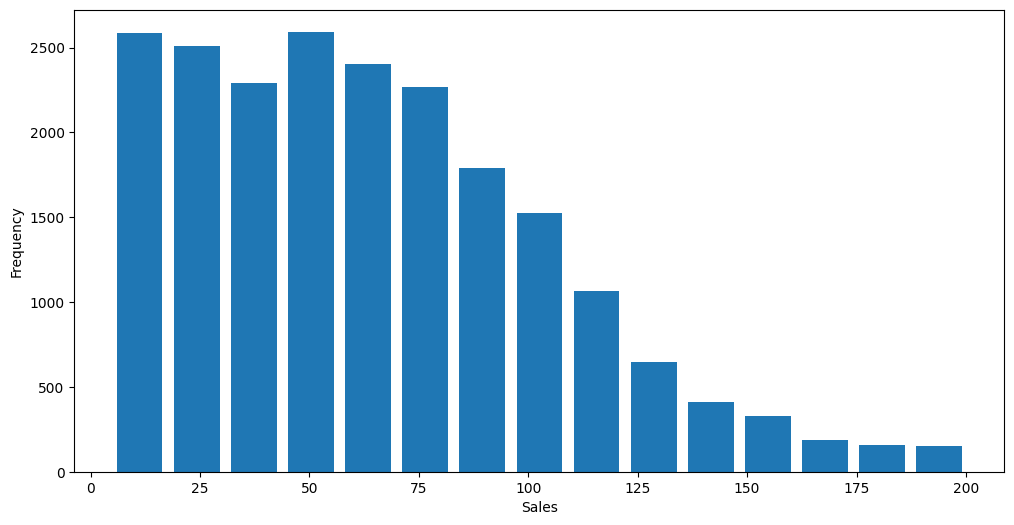

In [4]:
# example 2: Histograms
# bin size is calculated automatically or defined number of bins
plt.figure(figsize = (12, 6))
plt.hist(lures['SALES'], bins = 15, rwidth = 0.8)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

(array([2588., 2510., 2292., 2593., 2405., 2267., 1790., 1526., 1065.,
         644.,  412.,  329.,  188.,  156.,  150.]),
 array([  4.65 ,  17.702,  30.754,  43.806,  56.858,  69.91 ,  82.962,
         96.014, 109.066, 122.118, 135.17 , 148.222, 161.274, 174.326,
        187.378, 200.43 ]),
 <BarContainer object of 15 artists>)

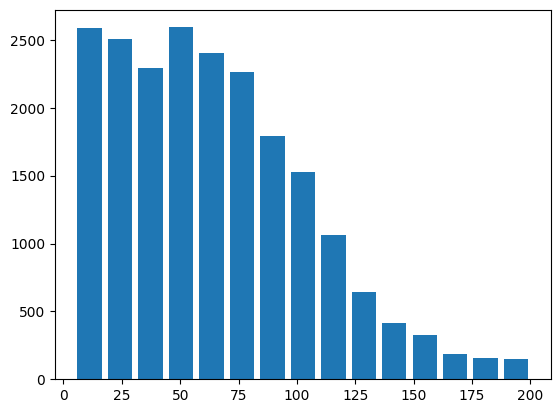

In [5]:
# hint: list of objects
# 1st array:frequencies
# 2nd array: start caps
plt.hist(lures['SALES'], bins =15, rwidth =0.8)

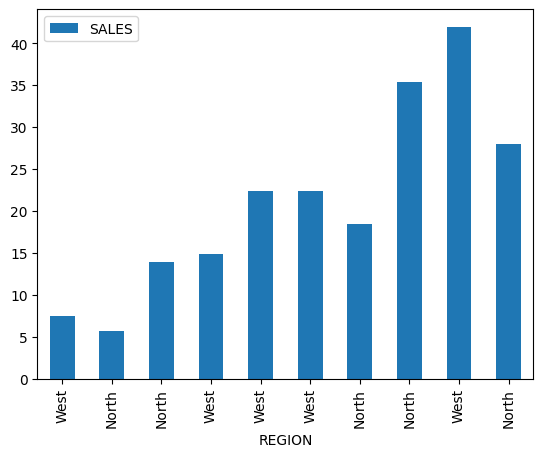

In [7]:
# plot func doesn't group by cat
lures[0:10].plot(kind = 'bar', x = 'REGION', y = 'SALES')
plt.show()

In [8]:
# grouping bars by cat
# summary table:
lures_by_region = lures.groupby(['REGION'], as_index = False).sum()
lures_by_region

C:\Users\wuamy\AppData\Local\Temp\ipykernel_13648\4183780304.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lures_by_region = lures.groupby(['REGION'], as_index = False).sum()


,REGION,QUANTITY,SALES,PRICE
0,North,74069,527398.13,58981.66
1,South,40979,300844.11,33430.75
2,West,73111,519195.89,57576.42


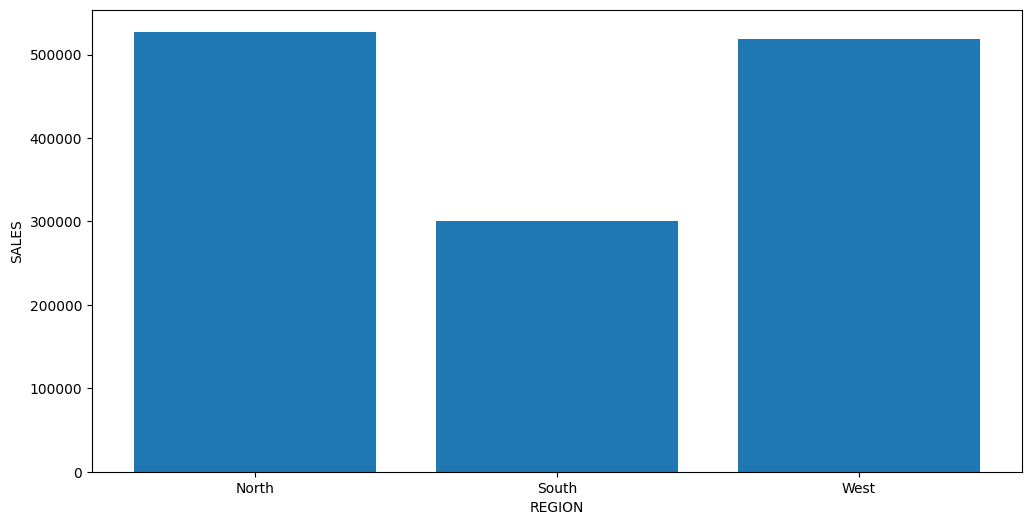

In [9]:
# let's make the bar chart
plt.figure(figsize = (12, 6))
plt.bar(lures_by_region['REGION'], lures_by_region['SALES'])
plt.xlabel('REGION')
plt.ylabel('SALES')
plt.show()

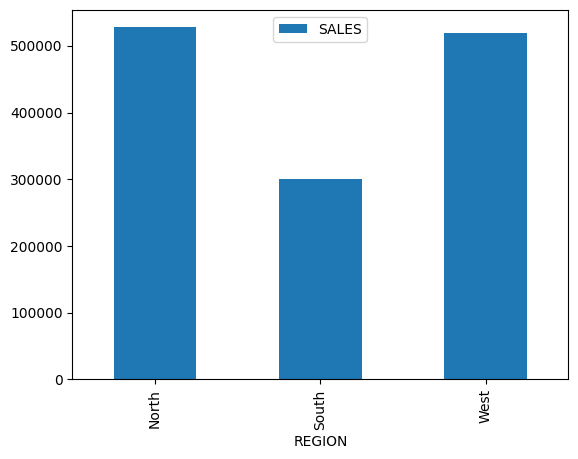

In [12]:
# additional resource:
#intermediate one-step solution with the plot method
#order of operations:dataframe.groupby().aggregation().plot()
lures.groupby(['REGION'], as_index = False).sum(numeric_only=True).plot(kind='bar', x='REGION', y='SALES')
plt.show()

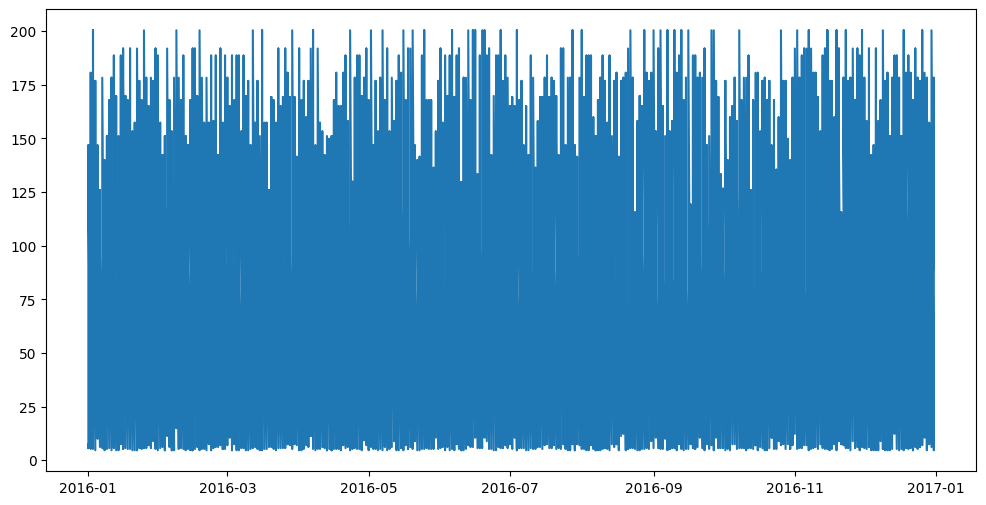

In [13]:
# same technique for time series
# visualizing the data as is results in a very dense plot
plt.figure(figsize=(12,6))
plt.plot(lures['DATE'], lures['SALES'])
plt.show()

In [17]:
# getting the daily figures
lures_by_day = lures.groupby(['DATE'], as_index = False).sum(numeric_only=True)
lures_by_day

,DATE,QUANTITY,SALES,PRICE
0,2016-01-01,487,3556.27,372.91
1,2016-01-02,598,4289.52,440.46
2,2016-01-03,504,3645.32,376.79
3,2016-01-04,520,3696.88,412.53
4,2016-01-05,577,3936.49,373.57
...,...,...,...,...
361,2016-12-27,564,4237.34,485.19
362,2016-12-28,513,3661.23,415.62
363,2016-12-29,582,4095.40,485.43
364,2016-12-30,528,3874.42,452.52


In [18]:
# date time format preserved
lures_by_day.dtypes

DATE        datetime64[ns]
QUANTITY             int64
SALES              float64
PRICE              float64
dtype: object

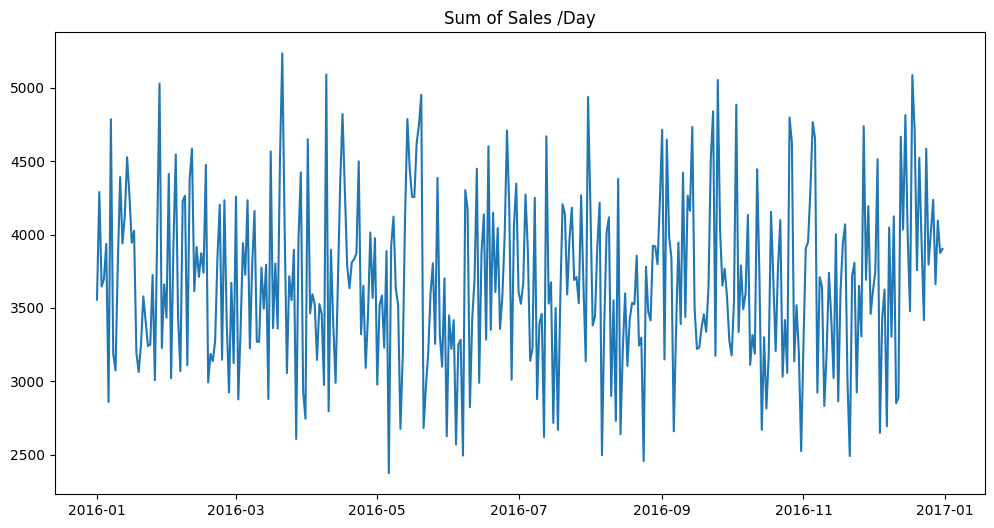

In [19]:
# readable chart, equally spaced data points
plt.figure(figsize = (12, 6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.title('Sum of Sales /Day')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

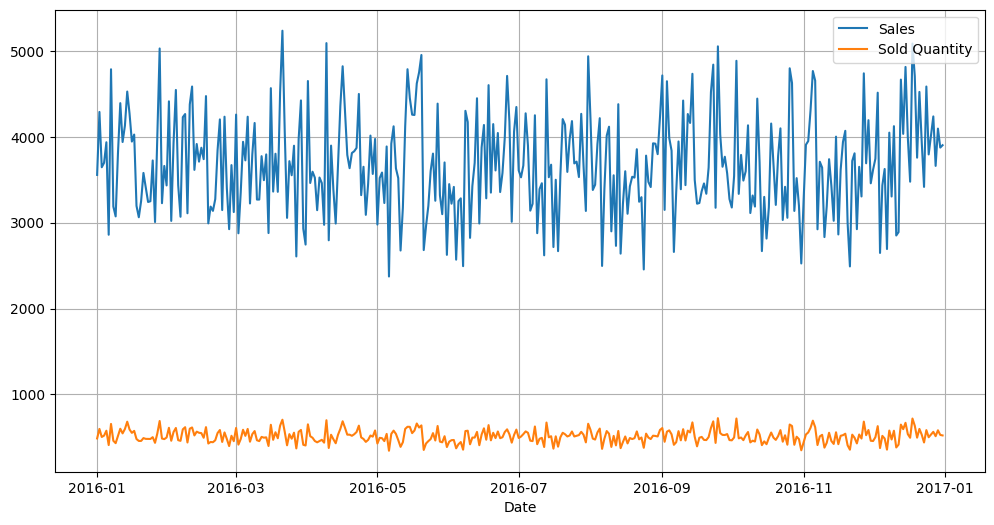

In [21]:
# line graph with two data series
plt.figure(figsize = (12, 6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.plot(lures_by_day['DATE'], lures_by_day['QUANTITY'])
plt.legend(['Sales', 'Sold Quantity'])
plt.xlabel('Date')
plt.grid()
plt.show

In [23]:
# group by city
lures_by_city = lures.groupby('CITY', as_index = False).sum(numeric_only=True)
lures_by_city

,CITY,QUANTITY,SALES,PRICE
0,Austin,16697,119113.03,13123.48
1,Chicago,14493,102905.07,11671.09
2,Los Angeles,21443,147968.11,16871.99
3,Miami,24282,181731.08,20307.27
4,New York,59576,424493.06,47310.57
5,San Francisco,10500,80844.42,9012.28
6,Seattle,41168,290383.36,31692.15


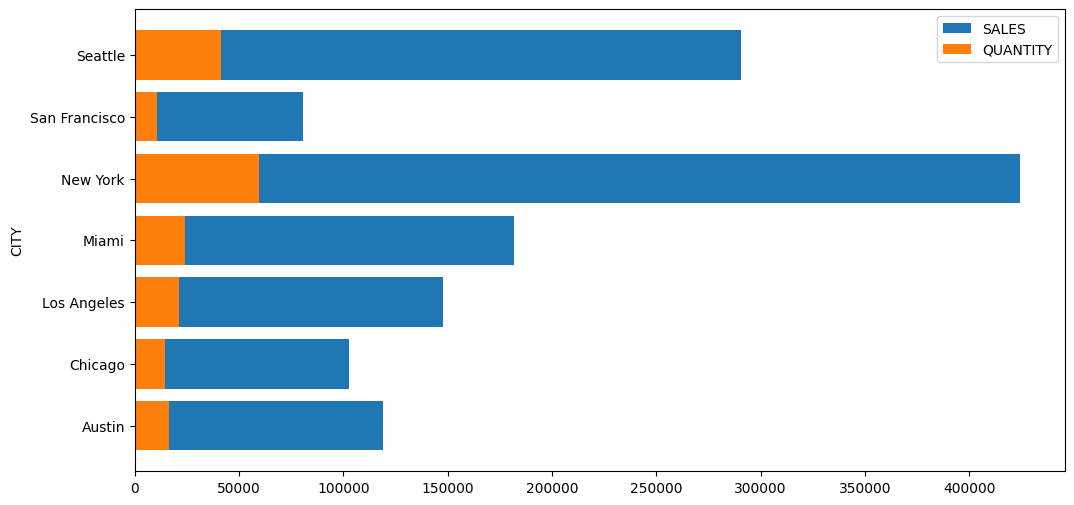

In [24]:
# overlapping bars - stacked bar chart
plt.figure(figsize = (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'])
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'])
plt.ylabel('CITY')
plt.legend(['SALES', 'QUANTITY'])
plt.show()


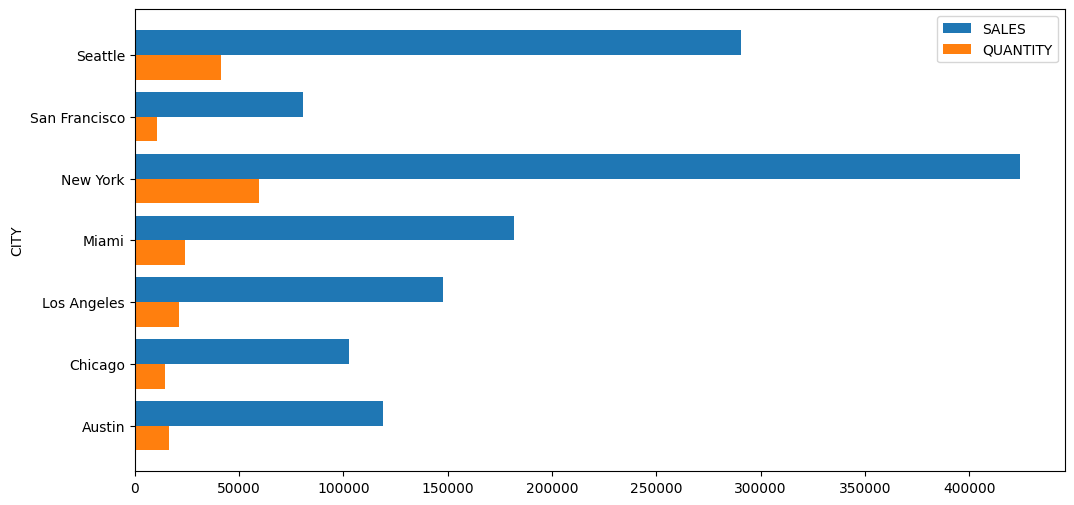

In [25]:
# grouped bar chart
plt.figure(figsize = (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'],
    align = 'edge', height = 0.4)
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'],
    align = 'edge', height = -0.4)
plt.ylabel('CITY')
plt.legend(['SALES', 'QUANTITY'])
plt.show()

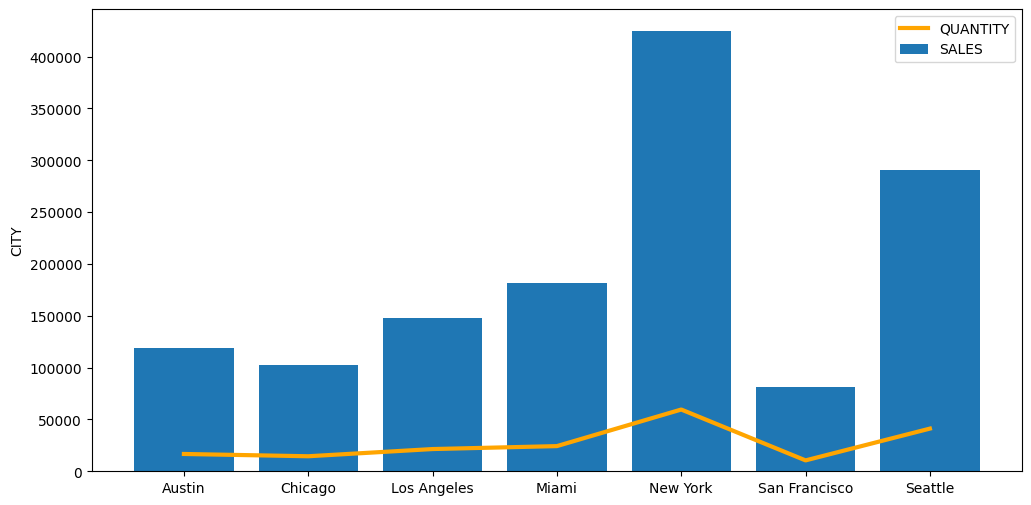

In [26]:
# combination plot
plt.figure(figsize = (12,6))
plt.plot(lures_by_city['CITY'], lures_by_city['QUANTITY'],
    linewidth = 3, color = 'orange')
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
    
plt.ylabel('CITY')
plt.legend(['QUANTITY', 'SALES'])
plt.show()

In [27]:
# creating helper objects
city = np.array(lures_by_city['CITY'])
sales = np.array(lures_by_city['SALES'])

In [28]:
sales = np.round(sales, 0)
sales = sales.astype(int)
sales

array([119113, 102905, 147968, 181731, 424493,  80844, 290383])

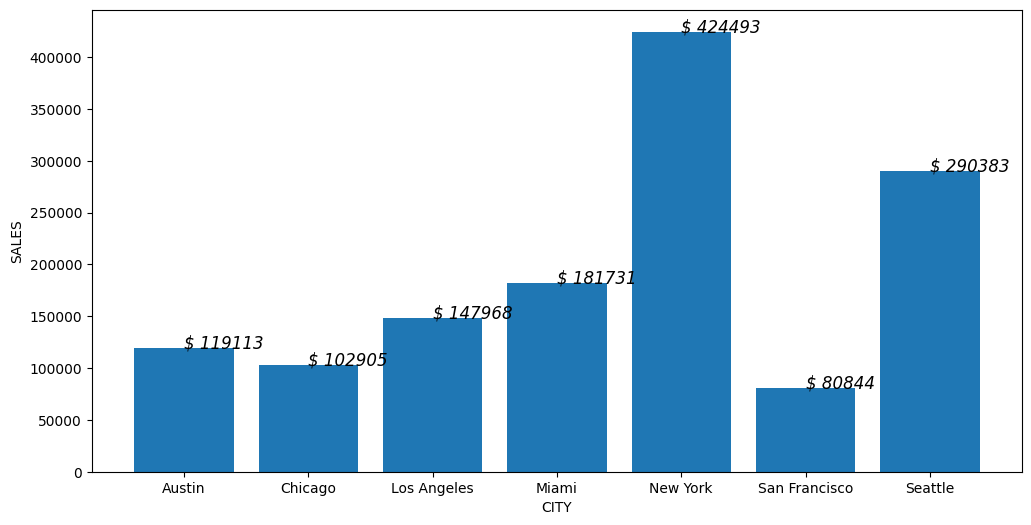

In [31]:
plt.figure(figsize = (12, 6))
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.xlabel('CITY')
plt.ylabel('SALES')

for i in range(len(sales)):
    plt.annotate(('$ ' + str(sales[i])), xy = (city[i], sales[i]),
                fontsize ='large', fontstyle = 'oblique')
    
plt.show()

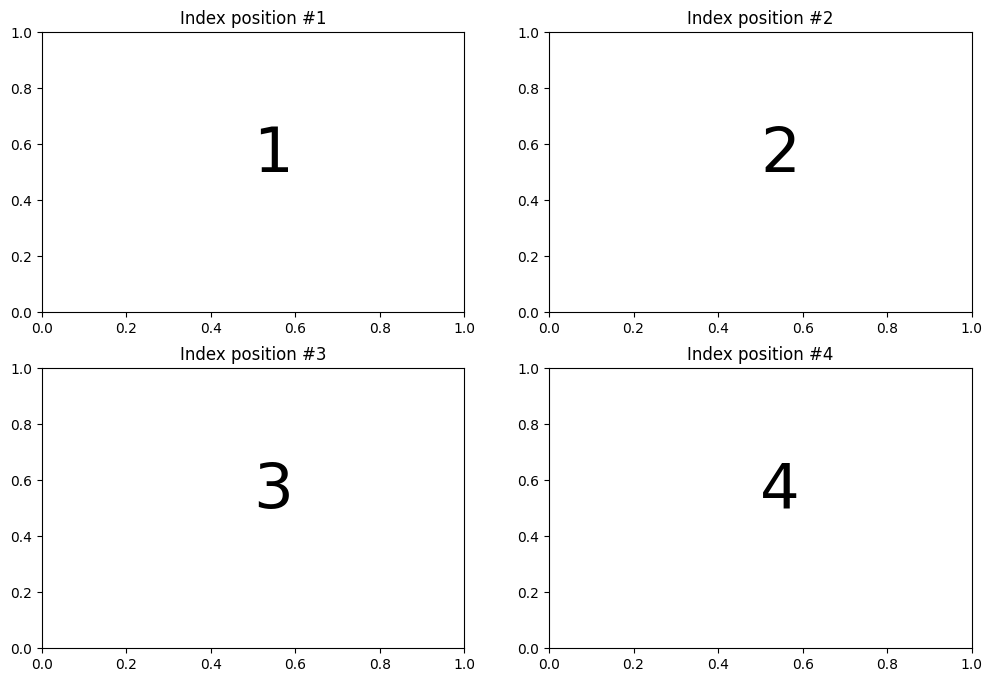

In [35]:
# subplot layouts
# setup: subplot(nrows_ncolumns_index)
# 2*2 grid
plt.figure(figsize = (12, 8))
plt.subplot(221)
plt.title('Index position #1')
plt.annotate('1', xy = (0.5, 0.5), fontsize = 45)

plt.subplot(222)
plt.title('Index position #2')
plt.annotate('2', xy = (0.5, 0.5), fontsize = 45)

plt.subplot(223)
plt.title('Index position #3')
plt.annotate('3', xy = (0.5, 0.5), fontsize = 45)

plt.subplot(224)
plt.title('Index position #4')
plt.annotate('4', xy = (0.5, 0.5), fontsize = 45)

plt.show()




